<a href="https://colab.research.google.com/github/m-eicardi/MTEch-2021/blob/main/Exerc%C3%ADcio3_MTEch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício 3

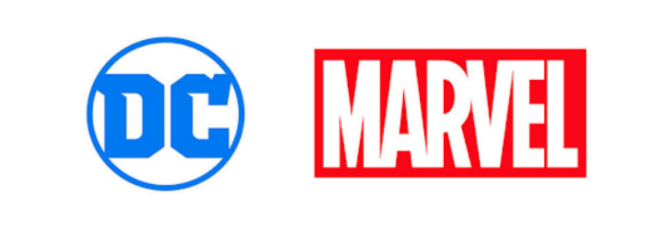

> Este é o último dos três exercícios práticos que serão disponibilizados durante o MTEch 2021.


> As bases contem dados sobre 611 personagens da Marvel e DC, dentre eles a destemida Mulher Maravilha, o grande Homem-Aranha e a mortal Viúva Negra.




1.1 Importando as bases de dados 

In [126]:
from google.colab import drive

drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d1 = pd.read_csv('/content/drive/MyDrive/MTEch - Evento/charcters_stats.csv')

d2 = pd.read_csv('/content/drive/MyDrive/MTEch - Evento/marvel_characters_info.csv')

In [128]:
d1

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [129]:
d2

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


1.2 Explorando os dados


In [130]:
#frequência absoluta de 'good' 'bad' and 'neutral'
d1['Alignment'].value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

In [131]:
#localizando apenas 'good'
d1.loc[(d1['Alignment'] == 'good')]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320
...,...,...,...,...,...,...,...,...,...
604,X-Man,good,88,53,53,95,92,84,465
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388


In [132]:
#localizando apenas 'bad'
d1.loc[(d1['Alignment'] == 'bad')]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...
586,Warp,bad,38,10,23,28,63,50,212
590,Weapon XI,bad,1,1,1,1,0,1,5
593,Willis Stryker,bad,38,16,23,28,41,60,206
605,Yellow Claw,bad,1,1,1,1,0,1,5


In [133]:
d2['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
ABC Studios            4
IDW Publishing         4
Icon Comics            4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Microsoft              1
J. K. Rowling          1
J. R. R. Tolkien       1
Titan Books            1
South Park             1
Hanna-Barbera          1
Universal Studios      1
Rebellion              1
Name: Publisher, dtype: int64

In [134]:
#apenas heróis da marvel e dc
dc_marvel = d2.loc[(d2['Publisher'] =='DC Comics') | (d2['Publisher'] == 'Marvel Comics')]

dc_marvel

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
5,5,Absorbing Man,bad,Male,blue,Human,No Hair,Marvel Comics,-,193.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...
728,728,Yellowjacket,good,Male,blue,Human,Blond,Marvel Comics,-,183.0,83.0
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


###2. Perguntas

2.1 *O quão inteligentes são os heróis nas bases? (histograma do atributo
inteligência)*

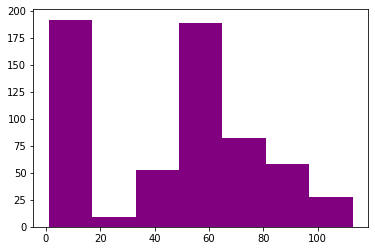

In [135]:
#gráfico pelo matplot
plt.hist(d1['Intelligence'], color='purple', bins=7)

plt.show()

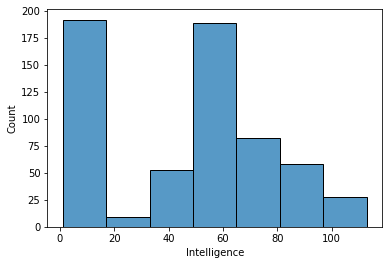

In [136]:
#gráfico pelo seaborn
sns.histplot(data=d1, x=d1['Intelligence'], bins=7)

2.2 *Os heróis mais poderosos (Power > 75), inteligentes (Intelligence > 80) e
rápidos (Speed > 80) são maioria do bem ou do mau?*

In [137]:
poderosos = d1.loc[(d1['Power'] >=75) |
                  (d1['Intelligence'] >=80) |
                  (d1['Speed'] >= 80)]

poderosos

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
12,Alan Scott,good,63,80,23,90,98,32,386
...,...,...,...,...,...,...,...,...,...
604,X-Man,good,88,53,53,95,92,84,465
606,Yellowjacket,good,88,10,12,28,12,14,164
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [138]:
poderosos['Name'].unique()

array(['Abe Sapien', 'Abin Sur', 'Abraxas', 'Air-Walker', 'Alan Scott',
       'Amazo', 'Ant-Man', 'Anti-Monitor', 'Anti-Venom', 'Apocalypse',
       'Aqualad', 'Aurora', 'Azazel', 'Bane', 'Batman', 'Batman II',
       'Beast', 'Beast Boy', 'Ben 10', 'Beta Ray Bill', 'Beyonder',
       'Bishop', 'Bizarro', 'Black Adam', 'Black Bolt', 'Black Mamba',
       'Black Panther', 'Bloodaxe', 'Blue Beetle III', 'Brainiac',
       'Brainiac 5', 'Cable', 'Cannonball', 'Captain Marvel', 'Carnage',
       'Century', 'Chameleon', 'Cyborg Superman', 'Cyclops', 'Darkseid',
       'Dash', 'Deadman', 'Deadpool', 'Destroyer', 'Doctor Doom',
       'Doctor Fate', 'Doctor Strange', 'Doomsday', 'Dormammu',
       'Dr Manhattan', 'Ego', 'Emma Frost', 'Evilhawk', 'Exodus',
       'Fallen One II', 'Faora', 'Firebird', 'Firestorm', 'Flash I',
       'Flash II', 'Flash III', 'Flash IV', 'Galactus', 'General Zod',
       'Giganta', 'Goku', 'Groot', 'Guy Gardner', 'Hal Jordan',
       'Harley Quinn', 'Hope Summers

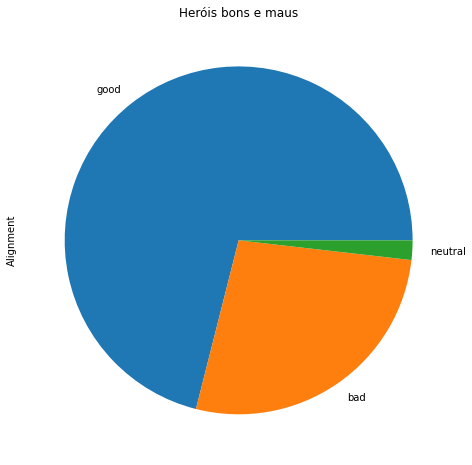

In [139]:
#porcentagem de bons e maus
d1['Alignment'].value_counts().plot(kind = 'pie',
                                    title = 'Heróis bons e maus',
                                    figsize = (10,8))

2.3 *Esses heróis mais poderosos, inteligentes e rápidos são maioria da Marvel
ou DC?*

*Modelo 1*

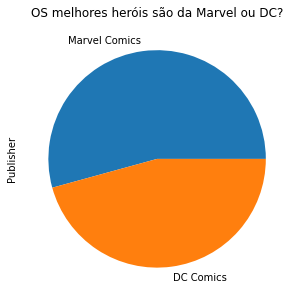

In [140]:
#usando uma lista com os mais poderosos
top_herois = poderosos['Name']

#relacionando os mais tops com 'publisher' filtrado em 'DC' e 'Marvel'
d3 = dc_marvel.loc[ dc_marvel['Name'].isin(top_herois)]

#Plotando o gráfico
d3['Publisher'].value_counts().plot(kind = 'pie',
                                     title = 'OS melhores heróis são da Marvel ou DC?', 
                                     figsize = (8,5))

*Modelo 2*

In [141]:
#usando uma lista com os mais poderosos
top_herois = poderosos['Name']

#relacionando os mais tops com 'publisher' filtrado em 'DC' e 'Marvel'
d3 = dc_marvel.loc[ dc_marvel['Name'].isin(top_herois)]

d3['Publisher'].value_counts()

Marvel Comics    89
DC Comics        75
Name: Publisher, dtype: int64

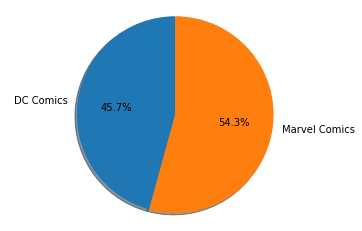

In [142]:
#criando o dataset
labels = 'DC Comics', 'Marvel Comics'
sizes = ['75', '89']

#criando representação/área de plotagem
fig1, ax1 = plt.subplots()

#criando o gráfico
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

#definir que ficará em círculo
ax1.axis('equal')

plt.show()